# Latihan Projek Data Sales
Data Sales yang diambil merupakan Data Penjualan dari Januari 2019 - Desember 2019, terdiri atas beberapa kolom yaitu :
- Order ID         = ID Pesanan
- Product          = Nama produk yang dibeli
- Quantity Ordered = Jumlah Produk yang dibeli
- Price Each       = Harga produk
- Order Date       = Tanggal pemesanan
- Purchase Address = Alamat Pembelian

Beberapa hal yang akan dilakukan pada data tersebut adalah sebagai berikut :
1. Menggabungkan seluruh data yang sebelumnya data penjualan per bulan menjadi data keseluruhan penjualan tahun 2019 dalam 1 file csv
2. Membersihkan dan menyiapkan data
3. Menggali informasi yang didapat untuk menjawab beberapa pertanyaan bisnis sebagai berikut :
- Q1 : Bulan apa yang penjualannya tertinggi di tahun 2019 
- Q2 : kota dengan penjualan tertinggi di tahun 2019
- Q3 : waktu paling tepat untuk melakukan pengiklanan
- Q4 : produk apa yang sering dibeli berbarengan
- Q5 : produk apa yang paling banyak terjual dan kenapa?

In [1]:
# Mengimport beberapa library yang dibutuhkan
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

# 1. Membaca dan Menggabungkan data csv

In [2]:
seluruh_bulan = [bulan for bulan in os.listdir("./Sales_Data")]
sales_2019 = pd.DataFrame()
for bulan in seluruh_bulan:
  temp = pd.read_csv("Sales_Data/"+bulan)
  sales_2019 = pd.concat([sales_2019, temp])
# sales_2019.to_csv("Sales_2019.csv", index=False)
sales_2019 = pd.read_csv("Sales_2019.csv")
sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# 2. Membersihkan dan Menyiapkan Data

### Menghilangkan data kosong atau NaN

In [3]:
sales_2019.dropna(how="all", inplace=True)
sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Menambahkan kolom Bulan

In [4]:
sales_2019['Month'] = pd.to_datetime(sales_2019['Order Date']).dt.month
sales_2019
# sepertinya ada bagian yang aneh dengan data. Kita selidiki


ParserError: Unknown string format: Order Date

In [5]:
sales_2019[sales_2019['Order Date']=='Order Date']
# Ternyata terdapat 355 baris data yang terduplikasi dengan nama kolom. Kita Hapus

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
sales_2019 = sales_2019[sales_2019['Order Date']!="Order Date"]

sales_2019['Month'] = pd.to_datetime(sales_2019['Order Date']).dt.month
sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Menambah kolom Penjualan

In [8]:
sales_2019['sales'] = sales_2019['Price Each'].astype('float') * sales_2019['Quantity Ordered'].astype('int')
sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Menambahkan kolom kota

In [9]:
sales_2019['kota'] = sales_2019['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,kota
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


### Menambahkan kolom jam

In [10]:
sales_2019['hour'] = pd.to_datetime(sales_2019['Order Date']).dt.hour
sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,kota,hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


# 3. Menjawab Beberapa Pertanyaan Bisnis

## Q1 : Bulan apa yang penjualannya tertinggi di tahun 2019

In [11]:
best_month = sales_2019.groupby('Month')['sales'].sum().reset_index().sort_values('sales', ascending=False)
# best_month['Month']= best_month['Month'].astype('str')
best_month

,Month,sales
11,12,4.613443e+06
9,10,3.736727e+06
3,4,3.390670e+06
10,11,3.199603e+06
4,5,3.152607e+06
2,3,2.807100e+06
6,7,2.647776e+06
5,6,2.577802e+06
7,8,2.244468e+06
1,2,2.202022e+06


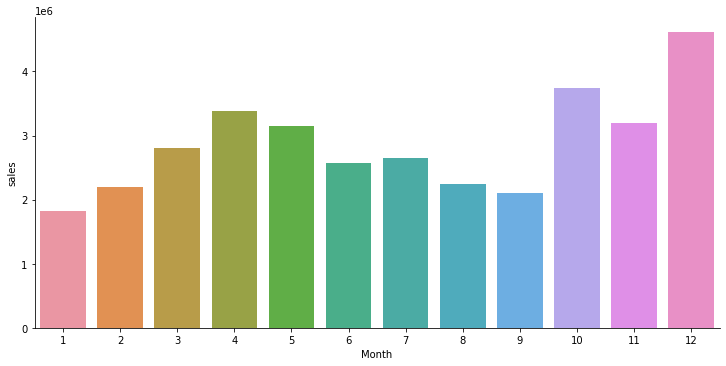

In [12]:
sns.catplot(data=best_month, x='Month', y='sales', kind='bar', aspect=2) 
plt.show()

# Dari grafik di bawah dapat diketahui bahwa bulan Desember mrpkn bulan dengan penjualan tertinggi 
# bulan dengan penjualan terendah ada di bulan Januari

## Q2 : kota dengan penjualan tertinggi di tahun 2019

In [13]:
best_city = sales_2019.groupby("kota")["sales"].sum().reset_index().sort_values('sales', ascending=False)
best_city


,kota,sales
8,San Francisco (CA),8.262204e+06
4,Los Angeles (CA),5.452571e+06
5,New York City (NY),4.664317e+06
2,Boston (MA),3.661642e+06
0,Atlanta (GA),2.795499e+06
3,Dallas (TX),2.767975e+06
9,Seattle (WA),2.747755e+06
7,Portland (OR),1.870732e+06
1,Austin (TX),1.819582e+06
6,Portland (ME),4.497583e+05


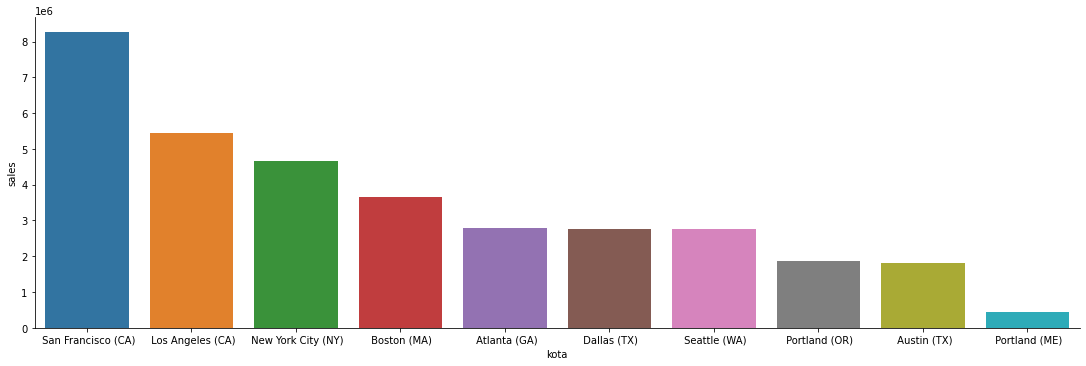

In [14]:
sns.catplot(data=best_city, x='kota', y='sales', kind='bar', aspect = 3)
plt.show()

## Q3 : waktu paling tepat untuk melakukan pengiklanan

In [15]:
best_hour = sales_2019.groupby('hour')['sales'].sum().reset_index().sort_values('sales', ascending=False)
# best_hour['hour'] = best_hour['hour'].astype('str')
pd.set_option("display.max_columns", len(best_hour))
best_hour.transpose()

,19,12,11,20,18,13,17,14,21,10,15,16,9,22,8,23,7,0,1,6,2,5,4,3
hour,19.00,12.00,11.00,20.00,18.0,13.0,17.00,14.00,21.00,10.00,15.0,16.00,9.00,22.00,8.00,23.00,7.00,0.00,1.00,6.0,2.00,5.00,4.00,3.00
sales,2412938.54,2316821.34,2300610.24,2281716.24,2219348.3,2155389.8,2129361.61,2083672.73,2042000.86,1944286.77,1941549.6,1904601.31,1639030.58,1607549.21,1192348.97,1179304.44,744854.12,713721.27,460866.88,448113.0,234851.44,230679.82,162661.01,145757.89


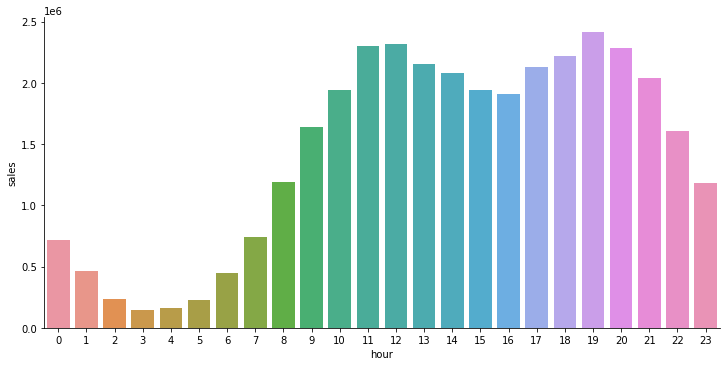

In [16]:
sns.catplot(data=best_hour, x='hour', y='sales', kind='bar', aspect=2)
plt.show()

# Berdasarkan tabel dan grafik diketahui pada jam 7-8 malam dan 11-12 siang adalah waktu tertinggi pelanggan melakukan pembelian

## Q4 : produk apa yang sering dibeli berbarengan

In [17]:
data_produk = sales_2019.copy()
data_produk['group_product'] = data_produk.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
data_produk.drop_duplicates(subset=['Order ID','group_product'], inplace=True)
data_produk

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,kota,hour,group_product
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,Bose SoundSport Headphones
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone, Wired Headphones"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,Wired Headphones
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,USB-C Charging Cable
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,AAA Batteries (4-pack)
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,iPhone
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,iPhone
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,34in Ultrawide Monitor


In [18]:
count = Counter()
for row in data_produk.group_product:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key, value)

# Handphone(iphone or google) dengan Charging Cable paling sering dibeli bersamaan disusul dengan
# Handphone(iphone or google) dengan Wired Headphones

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


## Q5 : produk apa yang paling banyak terjual dan kenapa?

In [19]:
sales_2019['Quantity Ordered'] = sales_2019['Quantity Ordered'].astype(int)
best_product = sales_2019.groupby('Product')['Quantity Ordered'].sum().reset_index()
# best_product['Quantity Ordered'] = best_product['Quantity Ordered'].astype(str)
best_product

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


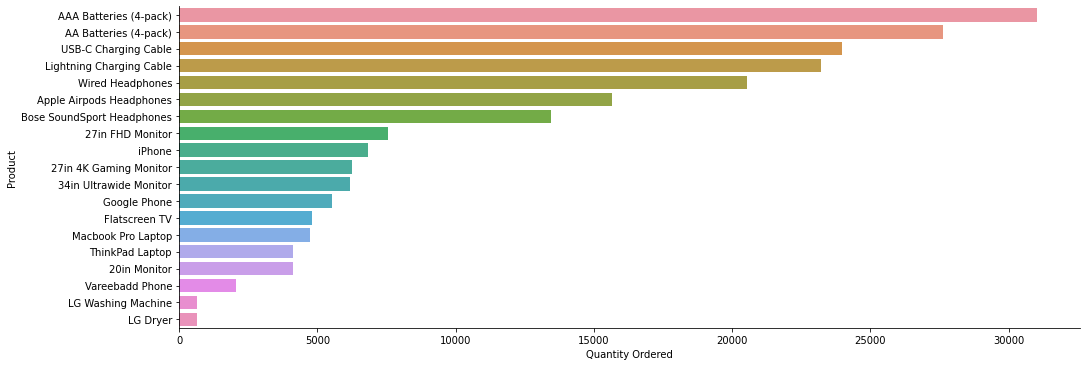

In [20]:
sns.catplot(data=best_product.sort_values('Quantity Ordered', ascending=False), y='Product', x='Quantity Ordered', kind='bar', aspect=3)
plt.show()

<ipython-input-23-abc4b7f54061>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_product['Product'], rotation='vertical', size=8)


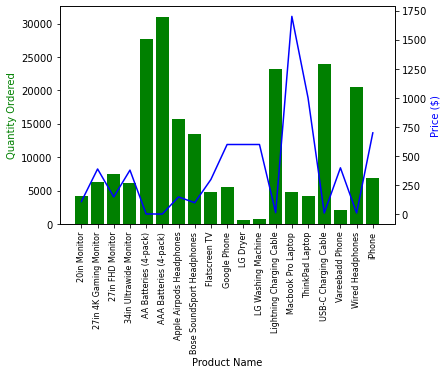

In [23]:
sales_2019['Price Each'] = pd.to_numeric(sales_2019['Price Each'])
harga_rata2 = sales_2019.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(best_product['Product'], best_product['Quantity Ordered'], color='g')
ax2.plot(best_product['Product'], harga_rata2, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(best_product['Product'], rotation='vertical', size=8)

plt.show()

- Berdasarkan grafik di atas produk dengan penjualan terbanyak adalah baterai A3 karena harga baterai yang murah dan banyak barang elektronik yang masih membutuhkan baterai.
- Sedangkan penjualan paling sedikit ada pada produk LG Dryer dan washing machine yang memang harganya cukup mahal dan tidak semua org membutuhkan mesin cuci di rumah, ada yang laundry di luar.
- Pada produk laptop(Macbook/ThinkPad) walaupun harga mereka paling tinggi tapi penjualannya di atas mesin cuci LG.